In [99]:
# Experiments using the text snippets instead of the full text

import pandas as pd
import glob
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


species = glob.glob('Export11-04-2018/*.tsv')

In [82]:
np_array_list = []
for file_ in species:
    df = pd.read_csv(file_,index_col=None, header=0, sep="\t")
    np_array_list.append(df.as_matrix())

comb_np_array = np.vstack(np_array_list)
big_frame = pd.DataFrame(comb_np_array)

In [83]:

temp = big_frame[7]

temp  = temp.str.replace('<b>(.*)</b>', '=ANIMAL=')
temp  = temp.str.replace('<title>', '')
temp  = temp.str.replace('</title>', '')
temp  = temp.str.replace('<p>', '')
temp  = temp.str.replace('</p>', '')
temp  = temp.str.replace('<title xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">' ,'')
temp  = temp.str.replace('<p xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">' ,'')
temp  = temp.str.replace('<ul><li>' ,'')
temp  = temp.str.replace('</li></ul>' ,'')

big_frame['snippets_clean'] = temp 

big_frame

0     1  \
0      MMKB04:000148808:mpeg21:a0103:ocr    1935   
1      MMRANM02:000029524:mpeg21:a0005:ocr  1927   
2      MMKB04:000139679:mpeg21:a0035:ocr    1918   
3      MMKB08:000111610:mpeg21:a0096:ocr    1937   
4      ddd:010015516:mpeg21:a0074:ocr       1934   
5      ddd:010016149:mpeg21:a0004:ocr       1935   
6      KBDDD02:000196795:mpeg21:a0013:ocr   1928   
7      MMHCO01:000087243:mpeg21:a0136:ocr   1935   
8      MMKB04:000196764:mpeg21:a0047:ocr    1928   
9      KBNRC01:000053668:mpeg21:a0061:ocr   1938   
10     MMDA03:000094659:mpeg21:a0003:ocr    1871   
11     MMGAVL01:000032833:mpeg21:a0037:ocr  1938   
12     MMHCO01:000080809:mpeg21:a0002:ocr   1917   
13     MMHCO01:000086708:mpeg21:a0001:ocr   1924   
14     MMKB04:000148720:mpeg21:a0091:ocr    1934   
15     MMKB04:000186496:mpeg21:a0066:ocr    1911   
16     MMKB04:000195209:mpeg21:a0024:ocr    1926   
17     MMKB04:000196392:mpeg21:a0004:ocr    1928   
18     MMSAEN01:000049616:mpeg21:a0051:ocr  1928   
19     MMKB08:000121738:mpeg21:a0006:ocr    1912   
20     MMRANM02:000018946:mpeg21:a0061:ocr  1917   
21     MMRANM02:000027422:mpeg21:a0002:ocr  1930   
22     MMRANM02:000027492:mpeg21:a0031:ocr  1930   
23     MMRANM02:000034940:mpeg21:a0047:ocr  1937   
24     MMSAEN01:000049644:mpeg21:a0063:ocr  1928   
25     MMSAB03:000062165:mpeg21:a0006:ocr   1917   
26     MMSADB01:000002103:mpeg21:a0045:ocr  1924   
27     MMSADB01:000002419:mpeg21:a0012:ocr  1923   
28     MMSADB01:000004074:mpeg21:a0048:ocr  1922   
29     MMSADB01:000010192:mpeg21:a0037:ocr  1929   
...                                    ...   ...   
11259  ddd:110619778:mpeg21:a0102:ocr       1883   
11260  ddd:110620625:mpeg21:a0149:ocr       1898   
11261  ddd:010056880:mpeg21:a0006:ocr       1842   
11262  ddd:010129695:mpeg21:a0160:ocr       1902   
11263  ddd:010144989:mpeg21:a0002:ocr       1886   
11264  ddd:010229084:mpeg21:a0196:ocr       1931   
11265  ddd:010240031:mpeg21:a0019:ocr       1810   
11266  ddd:010265224:mpeg21:a0049:ocr       1879   
11267  ddd:010469282:mpeg21:a0044:ocr       1917   
11268  ddd:010514465:mpeg21:a0025:ocr       1928   
11269  ddd:010579068:mpeg21:a0012:ocr       1809   
11270  ddd:010580961:mpeg21:a0013:ocr       1822   
11271  ddd:010587971:mpeg21:a0002:ocr       1881   
11272  ddd:010598720:mpeg21:a0019:ocr       1910   
11273  MMSADB01:000013359:mpeg21:a0066:ocr  1927   
11274  ddd:010599033:mpeg21:a0012:ocr       1911   
11275  ddd:010671809:mpeg21:a0009:ocr       1839   
11276  ddd:010735840:mpeg21:a0139:ocr       1904   
11277  ddd:010946701:mpeg21:a0004:ocr       1834   
11278  ddd:011087640:mpeg21:a0001:ocr       1887   
11279  ddd:011181840:mpeg21:a0006:ocr       1883   
11280  ddd:011182151:mpeg21:a0028:ocr       1879   
11281  ddd:110541749:mpeg21:a0045:ocr       1898   
11282  ddd:110556614:mpeg21:a0031:ocr       1900   
11283  ddd:110563245:mpeg21:a0278:ocr       1928   
11284  ddd:110598954:mpeg21:a0162:ocr       1934   
11285  KBDDD02:000212901:mpeg21:a0005:ocr   1862   
11286  MMCODA01:000156252:mpeg21:a0038:ocr  1932   
11287  MMKB04:000149483:mpeg21:a0186:ocr    1937   
11288  MMKB04:000189493:mpeg21:a0064:ocr    1907   

                                                                                                                                                                                                                                                                     2  \
0      Haagsche courant                                                                                                                                                                                                                                                  
1      Provinciale Geldersche en Nijmeegsche courant                                                                                                                                                                                                                     
2      Haagsche co

In [84]:
new_frame = big_frame[big_frame[9] != '07_Prevention'][big_frame['snippets_clean'].str.len() > 9]
new_frame.index = range(len(new_frame))
new_frame = new_frame[new_frame[9].str.len() > 5]
new_frame.index = range(len(new_frame))
#temp = new_frame[9]
column_name = 9
mask = new_frame[9] == '04_Pest'
new_frame.loc[mask, column_name] = '05_Pest_control'
new_frame[9] = new_frame[9].apply(str)


new_frame['snippets_clean']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0        DE =ANIMAL= te onderkennen aan den muskusachtigen reuk van het vocht dat hij afscheidt wanneer hij in angst zit Daarmee verjaagt hij                                                                                                                                                                                        
1       een motie van wantrouwen in de regeering Macdonald tot leider der Labour fractie in het Lagerhuis herkozen Er hebben zich =ANIMAL= in de Rijn en Mainstreken vertoond                                                                                                                                                        
2       heerscht in Beieren een rattenplaag Zoo bedragen de door de BeierSché visscherijvereeniging in 1917 alleen voor dood of levend ingeleverde =ANIMAL= uitgetrokken premies ^.262 mark en in de maanden Januari tot Maart werden reeds 1199 mark uitbetaald Do rat treedt tot                                                   
3       honoris causau

In [91]:
#text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf-svm', LinearSVC(class_weight='balanced', C=1.0, verbose=True))])
#text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', MultinomialNB()),])
#text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)),])
#text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', DecisionTreeClassifier())])
text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='brute', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=1))])


def customCrossValidation(X, y):
    ''' Perform a cross validation and print out the metrics '''
    skf = StratifiedKFold(n_splits=10)
    cm = None
    y_predicted_overall = None
    y_test_overall = None
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        text_clf.fit(X_train, y_train)
        y_predicted = text_clf.predict(X_test)
        # collect the y_predicted per fold
        if y_predicted_overall is None:
            y_predicted_overall = y_predicted
            y_test_overall = y_test
        else: 
            y_predicted_overall = np.concatenate([y_predicted_overall, y_predicted])
            y_test_overall = np.concatenate([y_test_overall, y_test])
        cv_cm = metrics.confusion_matrix(y_test, y_predicted)
        # sum the cv per fold
        if cm is None:
            cm = cv_cm
        else:
            cm += cv_cm
    print (metrics.classification_report(y_test_overall, y_predicted_overall, digits=3))
    print (cm)
    conf_matrix = cm
    return(conf_matrix)
 
customCrossValidation(new_frame['snippets_clean'], new_frame[9])   
#confusion_matrix = customCrossValidation(new_frame['snippets_clean'], new_frame[9])

                        precision    recall  f1-score   support

    01_Natural_history      0.507     0.672     0.578      1144
  02_Nuisance_material      0.161     0.791     0.268       388
03_Nuisance_immaterial      0.585     0.282     0.380       110
       05_Pest_control      0.549     0.253     0.346       669
    06_Hunt_economical      0.905     0.678     0.775      1947
          08_Accidents      0.628     0.404     0.492       230
         09_Figurative      0.654     0.305     0.416       334
        10_Other_beast      0.500     0.045     0.083        22
            11_Nobeast      0.941     0.838     0.887      4847
         12_Bagger_OCR      0.458     0.100     0.165       219

           avg / total      0.794     0.694     0.720      9910

[[ 769  233    3   42   23    5   16    0   49    4]
 [  27  307    1   25    7    9    4    0    8    0]
 [  16   46   31    6    0    8    0    0    3    0]
 [ 147  264    4  169   29   22    5    0   27    2]
 [ 167  332    0 

array([[ 769,  233,    3,   42,   23,    5,   16,    0,   49,    4],
       [  27,  307,    1,   25,    7,    9,    4,    0,    8,    0],
       [  16,   46,   31,    6,    0,    8,    0,    0,    3,    0],
       [ 147,  264,    4,  169,   29,   22,    5,    0,   27,    2],
       [ 167,  332,    0,   33, 1321,    2,   10,    1,   77,    4],
       [  33,   70,   11,   13,    1,   93,    2,    0,    7,    0],
       [  87,  112,    0,    3,    7,    1,  102,    0,   22,    0],
       [   5,    7,    0,    1,    4,    0,    1,    1,    3,    0],
       [ 237,  457,    2,   12,   46,    6,   10,    0, 4061,   16],
       [  28,   77,    1,    4,   22,    2,    6,    0,   57,   22]])

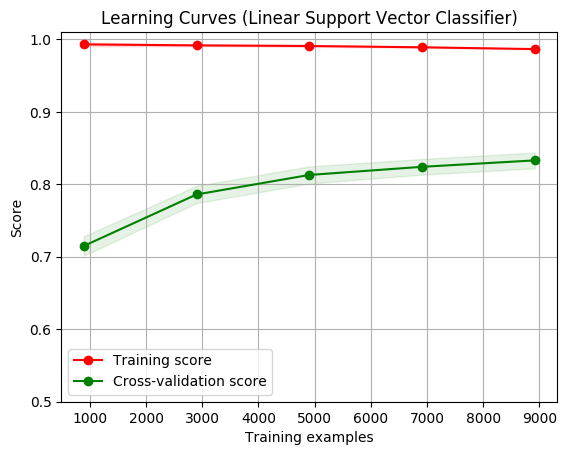

In [107]:
# Learning curves 

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Then this is where the processing starts 
text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf-svm', LinearSVC(class_weight='balanced', C=1.0, verbose=True))])
X, y = new_frame['snippets_clean'], new_frame[9]

title = "Learning Curves (Linear Support Vector Classifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)
estimator = text_clf
plt.style.use('default')
plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=4)

plt.show()




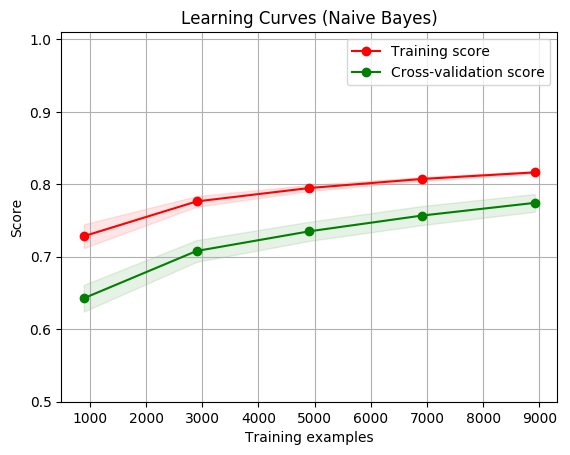

In [106]:
from sklearn.naive_bayes import MultinomialNB

nb_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', MultinomialNB()),])

title = "Learning Curves (Naive Bayes)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)
estimator = nb_clf
plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=4)

plt.show()

In [85]:
# Confusion matrix 

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

#a4_dims = (11.7, 8.27)
#fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
#yticks = ['Natural history', 'Nuisance material', 'Nuisance immaterial', 'Pest control', 'Hunt economic', 'Accidents', 'Figurative', 'Other beast', 'No beast', 'Bad OCR']
#ax = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="YlGnBu", robust=True, yticklabels=yticks, xticklabels=yticks)
#ax.set_xticklabels(yticks, rotation='45', fontsize=10)
#ax.set_yticklabels(yticks, rotation='45', fontsize=10)
#ax.set(xlabel='Actual Class', ylabel='Predicted class')
#plt.show()

In [ ]:
# Two class experiments 

In [108]:
column_name = 9
mask = new_frame[9] == '01_Natural_history'
new_frame.loc[mask, column_name] = 'BEAST'

mask = new_frame[9] == '02_Nuisance_material'
new_frame.loc[mask, column_name] = 'BEAST'

mask = new_frame[9] == '03_Nuisance_immaterial'
new_frame.loc[mask, column_name] = 'BEAST'

mask = new_frame[9] == '05_Pest_control'
new_frame.loc[mask, column_name] = 'BEAST'

mask = new_frame[9] == '06_Hunt_economical'
new_frame.loc[mask, column_name] = 'BEAST'

mask = new_frame[9] == '08_Accidents'
new_frame.loc[mask, column_name] = 'BEAST'

mask = new_frame[9] == '09_Figurative'
new_frame.loc[mask, column_name] = 'BEAST'

mask = new_frame[9] == '10_Other_beast'
new_frame.loc[mask, column_name] = 'BEAST'

new_frame

0     1  \
0     MMKB04:000148808:mpeg21:a0103:ocr    1935   
1     MMRANM02:000029524:mpeg21:a0005:ocr  1927   
2     MMKB04:000139679:mpeg21:a0035:ocr    1918   
3     MMKB08:000111610:mpeg21:a0096:ocr    1937   
4     ddd:010015516:mpeg21:a0074:ocr       1934   
5     ddd:010016149:mpeg21:a0004:ocr       1935   
6     KBDDD02:000196795:mpeg21:a0013:ocr   1928   
7     MMHCO01:000087243:mpeg21:a0136:ocr   1935   
8     MMKB04:000196764:mpeg21:a0047:ocr    1928   
9     KBNRC01:000053668:mpeg21:a0061:ocr   1938   
10    MMDA03:000094659:mpeg21:a0003:ocr    1871   
11    MMGAVL01:000032833:mpeg21:a0037:ocr  1938   
12    MMHCO01:000080809:mpeg21:a0002:ocr   1917   
13    MMHCO01:000086708:mpeg21:a0001:ocr   1924   
14    MMKB04:000148720:mpeg21:a0091:ocr    1934   
15    MMKB04:000186496:mpeg21:a0066:ocr    1911   
16    MMKB04:000195209:mpeg21:a0024:ocr    1926   
17    MMKB04:000196392:mpeg21:a0004:ocr    1928   
18    MMSAEN01:000049616:mpeg21:a0051:ocr  1928   
19    MMKB08:000121738:mpeg21:a0006:ocr    1912   
20    MMRANM02:000018946:mpeg21:a0061:ocr  1917   
21    MMRANM02:000027422:mpeg21:a0002:ocr  1930   
22    MMRANM02:000027492:mpeg21:a0031:ocr  1930   
23    MMRANM02:000034940:mpeg21:a0047:ocr  1937   
24    MMSAEN01:000049644:mpeg21:a0063:ocr  1928   
25    MMSAB03:000062165:mpeg21:a0006:ocr   1917   
26    MMSADB01:000002103:mpeg21:a0045:ocr  1924   
27    MMSADB01:000002419:mpeg21:a0012:ocr  1923   
28    MMSADB01:000004074:mpeg21:a0048:ocr  1922   
29    MMSADB01:000010192:mpeg21:a0037:ocr  1929   
...                                   ...   ...   
9880  ddd:110619778:mpeg21:a0102:ocr       1883   
9881  ddd:110620625:mpeg21:a0149:ocr       1898   
9882  ddd:010056880:mpeg21:a0006:ocr       1842   
9883  ddd:010129695:mpeg21:a0160:ocr       1902   
9884  ddd:010144989:mpeg21:a0002:ocr       1886   
9885  ddd:010229084:mpeg21:a0196:ocr       1931   
9886  ddd:010240031:mpeg21:a0019:ocr       1810   
9887  ddd:010265224:mpeg21:a0049:ocr       1879   
9888  ddd:010469282:mpeg21:a0044:ocr       1917   
9889  ddd:010514465:mpeg21:a0025:ocr       1928   
9890  ddd:010579068:mpeg21:a0012:ocr       1809   
9891  ddd:010580961:mpeg21:a0013:ocr       1822   
9892  ddd:010587971:mpeg21:a0002:ocr       1881   
9893  ddd:010598720:mpeg21:a0019:ocr       1910   
9894  MMSADB01:000013359:mpeg21:a0066:ocr  1927   
9895  ddd:010599033:mpeg21:a0012:ocr       1911   
9896  ddd:010671809:mpeg21:a0009:ocr       1839   
9897  ddd:010735840:mpeg21:a0139:ocr       1904   
9898  ddd:010946701:mpeg21:a0004:ocr       1834   
9899  ddd:011087640:mpeg21:a0001:ocr       1887   
9900  ddd:011181840:mpeg21:a0006:ocr       1883   
9901  ddd:011182151:mpeg21:a0028:ocr       1879   
9902  ddd:110541749:mpeg21:a0045:ocr       1898   
9903  ddd:110556614:mpeg21:a0031:ocr       1900   
9904  ddd:110563245:mpeg21:a0278:ocr       1928   
9905  ddd:110598954:mpeg21:a0162:ocr       1934   
9906  KBDDD02:000212901:mpeg21:a0005:ocr   1862   
9907  MMCODA01:000156252:mpeg21:a0038:ocr  1932   
9908  MMKB04:000149483:mpeg21:a0186:ocr    1937   
9909  MMKB04:000189493:mpeg21:a0064:ocr    1907   

                                                                                                                                                                                                                                                                    2  \
0     Haagsche courant                                                                                                                                                                                                                                                  
1     Provinciale Geldersche en Nijmeegsche courant                                                                                                                                                                                                                     
2     Haagsche courant                                                            

In [111]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

#text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf-svm', LinearSVC(class_weight='balanced', C=1.0, verbose=True))])
text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', MultinomialNB()),])
#text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)),])
#knn_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='brute', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=1))])

new_frame = new_frame[new_frame[9] != '12_Bagger_OCR']
new_frame.index = range(len(new_frame))

def customCrossValidation(X, y):
    ''' Perform a cross validation and print out the metrics '''
    skf = StratifiedKFold(n_splits=10)
    cm = None
    y_predicted_overall = None
    y_test_overall = None
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        text_clf.fit(X_train, y_train)
        y_predicted = text_clf.predict(X_test)
        # collect the y_predicted per fold
        if y_predicted_overall is None:
            y_predicted_overall = y_predicted
            y_test_overall = y_test
        else: 
            y_predicted_overall = np.concatenate([y_predicted_overall, y_predicted])
            y_test_overall = np.concatenate([y_test_overall, y_test])
        cv_cm = metrics.confusion_matrix(y_test, y_predicted)
        # sum the cv per fold
        if cm is None:
            cm = cv_cm
        else:
            cm += cv_cm
    print (metrics.classification_report(y_test_overall, y_predicted_overall, digits=3))
    print (cm)
    
customCrossValidation(new_frame['snippets_clean'], new_frame[9])

             precision    recall  f1-score   support

 11_Nobeast      0.971     0.867     0.916      4847
      BEAST      0.880     0.974     0.925      4844

avg / total      0.925     0.921     0.920      9691

[[4202  645]
 [ 125 4719]]


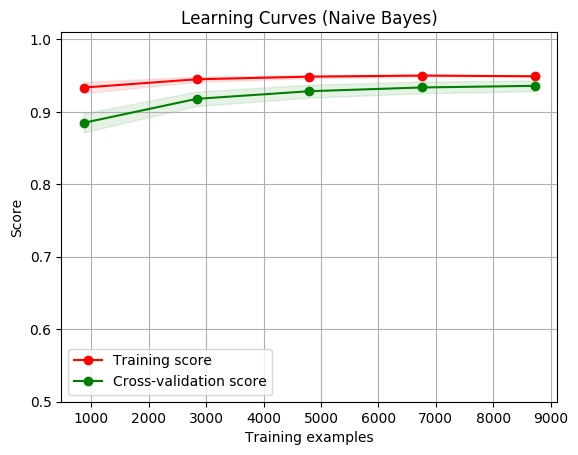

In [112]:
from sklearn.naive_bayes import MultinomialNB

nb_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf', MultinomialNB()),])

X, y = new_frame['snippets_clean'], new_frame[9]
title = "Learning Curves (Naive Bayes)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.1, random_state=0)
estimator = nb_clf
plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=4)

plt.show()

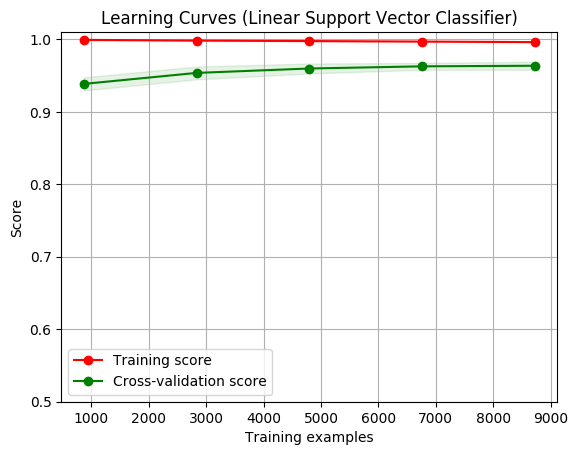

In [113]:
# Then this is where the processing starts 
text_clf = Pipeline([('tfidf', TfidfVectorizer(min_df=5, max_df=0.7, sublinear_tf=True, ngram_range=(1,2), analyzer='word', max_features=10000)), ('clf-svm', LinearSVC(class_weight='balanced', C=1.0, verbose=True))])
X, y = new_frame[7], new_frame[9]

title = "Learning Curves (Linear Support Vector Classifier)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
estimator = text_clf

plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=4)

plt.show()
              

In [102]:
plt.style.use('default')
plt.show()